# Extending Jupyter Notebooks
In this notebook we will learn how we can use Python to modify cells in the Jupyter notebook we are executing right now using [IPython](https://ipython.org/).

In [1]:
import IPython

## Adding cells
First we setup a function that can add a new cell to our jupyter notebook.

In [2]:
def add_code_cell_below(code, replace_current_cell=False, execute_code:bool=False):
    """
    Add a new code cell to the currently running Jupyter Notebook.
    Optional: Replace the current cell instead of creating a new one.
    Optional: Execute the code
    """
    from IPython.core.getipython import get_ipython

    p = get_ipython()

    p.set_next_input(code, replace=replace_current_cell)
    if execute_code:
        p.run_cell(code)

In [3]:
add_code_cell_below("print('Hello World')")

In [ ]:
print('Hello World')

In [4]:
print('Hello World')

Hello World


## Jupyter Magics
Next, we introduce a new Jupyter magic, that allows us to handle text in Jupyter cells when the user hits SHIFT+ENTER.

In [5]:
from IPython.core.magic import register_line_cell_magic
from llm_utilities import prompt_scadsai_llm

@register_line_cell_magic
def alice(line: str, cell: str = ""):
    # ask LLM to write code
    code = prompt_scadsai_llm(f"""Please write Python code which does this: 
 ----------------------------------------------
| YOU CAN ENTER DOMAIN SPECIFIC KNOWLEDGE HERE |
 ----------------------------------------------

{line}
{cell}

Do not explain anything, just provide the code.""")
    
    # clean output
    code = code.strip("\n").strip("```python").strip("```").strip("\n")
    
    add_code_cell_below(code)

In [6]:
%alice print Hello world!

In [ ]:
print("Hello world!")

In [7]:
print("Hello world!")

Hello world!


## Exercise
Create an image processing workflow by writing english prompts only. Try to not edit code manually.

In [14]:
%%alice 
please write very short python code for plotting a 
sigmoid function

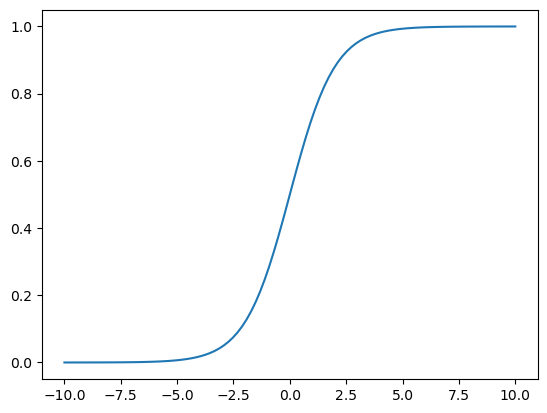

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.show()